<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/drowsiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/dataset_new.zip 

Archive:  /content/dataset_new.zip
   creating: dataset_new/
   creating: dataset_new/test/
   creating: dataset_new/test/no_yawn/
  inflating: dataset_new/test/no_yawn/1004.jpg  
  inflating: dataset_new/test/no_yawn/1007.jpg  
  inflating: dataset_new/test/no_yawn/1010.jpg  
  inflating: dataset_new/test/no_yawn/1033.jpg  
  inflating: dataset_new/test/no_yawn/1044.jpg  
  inflating: dataset_new/test/no_yawn/1050.jpg  
  inflating: dataset_new/test/no_yawn/1063.jpg  
  inflating: dataset_new/test/no_yawn/1067.jpg  
  inflating: dataset_new/test/no_yawn/1096.jpg  
  inflating: dataset_new/test/no_yawn/1114.jpg  
  inflating: dataset_new/test/no_yawn/1118.jpg  
  inflating: dataset_new/test/no_yawn/1129.jpg  
  inflating: dataset_new/test/no_yawn/113.jpg  
  inflating: dataset_new/test/no_yawn/1134.jpg  
  inflating: dataset_new/test/no_yawn/115.jpg  
  inflating: dataset_new/test/no_yawn/1213.jpg  
  inflating: dataset_new/test/no_yawn/1267.jpg  
  inflating: dataset_new/test/no_yawn/

In [2]:
import tensorflow as tf
import matplotlib
import cv2

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/dataset_new/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 1233 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        '/content/dataset_new/test',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical')

Found 215 images belonging to 2 classes.


In [6]:
#build CNN model
#intialize
cnn=tf.keras.models.Sequential()

In [7]:
#convolution
from keras.regularizers import l2
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3],
                               kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))



cnn.add(tf.keras.layers.Dropout(0.3))

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
#add one more layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3],
       kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
#Flatten
cnn.add(tf.keras.layers.Flatten())

In [12]:
#Full Connection
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [13]:
#Output layer
cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [14]:
#Compile the model
cnn.compile(optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

In [16]:
history=cnn.fit(x=train_generator,validation_data=validation_generator,epochs=50)

Epoch 1/50
39/39 [==============================] - 20s 207ms/step - loss: 1.0623 - accuracy: 0.5531 - val_loss: 1.0545 - val_accuracy: 0.6279
Epoch 2/50
39/39 [==============================] - 8s 202ms/step - loss: 1.0410 - accuracy: 0.6075 - val_loss: 1.0424 - val_accuracy: 0.5721
Epoch 3/50
39/39 [==============================] - 8s 200ms/step - loss: 1.0234 - accuracy: 0.6204 - val_loss: 1.0276 - val_accuracy: 0.6047
Epoch 4/50
39/39 [==============================] - 8s 196ms/step - loss: 1.0033 - accuracy: 0.6212 - val_loss: 1.0140 - val_accuracy: 0.6372
Epoch 5/50
39/39 [==============================] - 8s 199ms/step - loss: 0.9895 - accuracy: 0.6245 - val_loss: 1.0017 - val_accuracy: 0.6186
Epoch 6/50
39/39 [==============================] - 8s 202ms/step - loss: 0.9737 - accuracy: 0.6294 - val_loss: 0.9917 - val_accuracy: 0.5860
Epoch 7/50
39/39 [==============================] - 8s 199ms/step - loss: 0.9663 - accuracy: 0.6350 - val_loss: 0.9830 - val_accuracy: 0.6000
Epoch

In [17]:
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


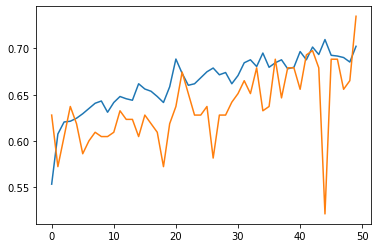

In [22]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()

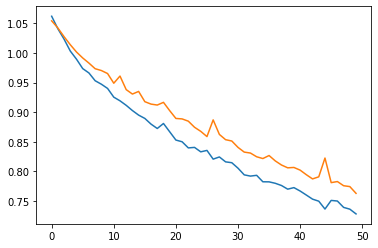

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img('/content/testing/testing/gha_/WIN_20220522_08_55_13_Pro resized.jpg',target_size=(64,64))

test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
    prediction='cha'
if result[0][1]==1:
    prediction='chcha'
if result[0][2]==1:
    prediction='gaa'
if result[0][3]==1:
    prediction='gha'
if result[0][4]==1:
    prediction='jaa'
if result[0][5]==1:
    prediction='ka'
if result[0][6]==1:
    prediction='kha'
if result[0][7]==1:
    prediction='nga'  

    


In [ ]:
prediction

'gha'

In [ ]:
 train_generator.class_indices
    

{'cha new': 0,
 'chcha new': 1,
 'gaa new (2)': 2,
 'gha new': 3,
 'jaa new': 4,
 'ka_new': 5,
 'kha_new': 6,
 'nga new (2)': 7}

In [ ]:
result


array([[0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/dataset_new/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 1233 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        '/content/dataset_new/test',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical')

Found 215 images belonging to 2 classes.


In [6]:
cnn1=tf.keras.models.Sequential()

In [8]:
from keras.regularizers import l2
cnn1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3],
                               kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))



cnn1.add(tf.keras.layers.Dropout(0.3))

In [9]:
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [10]:
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3],
       kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
cnn1.add(tf.keras.layers.Dropout(0.2))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn1.add(tf.keras.layers.Flatten())

In [13]:
cnn1.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [14]:
cnn1.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [15]:
cnn1.compile(optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [16]:
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

In [17]:
history=cnn1.fit(x=train_generator,validation_data=validation_generator,epochs=50)

Epoch 1/50
39/39 [==============================] - 11s 208ms/step - loss: 1.0569 - accuracy: 0.5377 - val_loss: 0.8777 - val_accuracy: 0.5628
Epoch 2/50
39/39 [==============================] - 8s 215ms/step - loss: 0.8010 - accuracy: 0.6488 - val_loss: 0.7858 - val_accuracy: 0.6186
Epoch 3/50
39/39 [==============================] - 8s 198ms/step - loss: 0.7533 - accuracy: 0.6618 - val_loss: 0.7530 - val_accuracy: 0.6558
Epoch 4/50
39/39 [==============================] - 8s 201ms/step - loss: 0.6993 - accuracy: 0.6853 - val_loss: 0.7221 - val_accuracy: 0.6605
Epoch 5/50
39/39 [==============================] - 8s 201ms/step - loss: 0.6830 - accuracy: 0.6975 - val_loss: 0.6997 - val_accuracy: 0.6977
Epoch 6/50
39/39 [==============================] - 8s 200ms/step - loss: 0.6757 - accuracy: 0.6886 - val_loss: 0.6915 - val_accuracy: 0.6977
Epoch 7/50
39/39 [==============================] - 8s 203ms/step - loss: 0.6508 - accuracy: 0.7040 - val_loss: 0.6811 - val_accuracy: 0.7070
Epoch

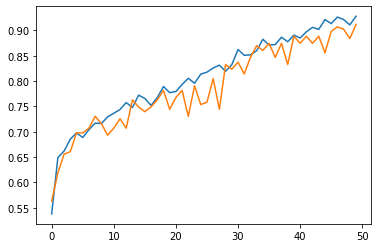

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

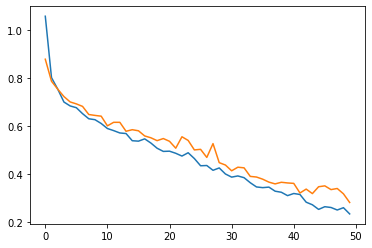

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])